<a href="https://colab.research.google.com/github/ambitama-poddar/Machine-Learning-Practicals/blob/main/DA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**-Submitted by Ambitama Poddar(22MCA0106)**

##**Digital Assessment-2**

##**1a. NAND gate simulation**

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
X1=tf.Variable(initial_value=[0.,1.,0.,1.])
X2=tf.Variable(initial_value=[0.,0.,1.,1.])
Y_NAND=tf.Variable(initial_value=[1.,1.,1.,0.])

In [3]:
#Defining the model
class Model(object):

   def __init__(self):
        self.W1 = tf.Variable(initial_value=tf.random.normal([1]))
        self.W2 = tf.Variable(initial_value=tf.random.normal([1]))
        self.b = tf.Variable(initial_value=tf.random.normal([1]))

   def __call__(self, x1,x2):
        self.K1=self.W1 * x1 + self.W2 * x2 + self.b
        self.Output = tf.keras.activations.sigmoid(self.K1)
        return(self.Output)

model=Model()

In [4]:
#Cost function
def compute_cost(target_y, predicted_y):
    c=tf.keras.losses.BinaryCrossentropy()
    return(c(target_y,predicted_y))

In [5]:
def None_to_Zero(v):
    if v==None:
        v=0
    return v

In [6]:
def train(model, X1, X2, Y2, learning_rate):
    with tf.GradientTape() as t:
        current_loss = compute_cost(Y2, model(X1, X2))
    dW1, dW2, db = t.gradient(current_loss, [model.W1, model.W2, model.b])
    dW1 = None_to_Zero(dW1)
    db = None_to_Zero(db)
    dW2 = None_to_Zero(dW2)
    model.W1.assign_sub(learning_rate * dW1)
    model.b.assign_sub(learning_rate * db)
    model.W2.assign_sub(learning_rate * dW2)

In [7]:
epochs = range(1000)
learning_rate = 0.1
for epoch in epochs:
    train(model, X1, X2, Y_NAND, learning_rate)

# Once the training is done we can find results by calling the Model Class object as
print(np.round(model(X1, X2).numpy()))

[1. 1. 1. 0.]


In [8]:
W_NAND = {'W1': round(model.W1.numpy()[0], 6),
          'W2': round(model.W2.numpy()[0], 6),
          'b': round(model.b.numpy()[0], 6)}

In [9]:
W_NAND

{'W1': -2.988197, 'W2': -2.961297, 'b': 4.681455}

##**1b. Three input AND gate simulation**

In [10]:
X1 = tf.Variable(initial_value=[0., 0., 0., 0., 1., 1., 1., 1.])
X2 = tf.Variable(initial_value=[0., 0., 1., 1., 0., 0., 1., 1.])
X3 = tf.Variable(initial_value=[0., 1., 0., 1., 0., 1., 0., 1.])
Y_AND = tf.Variable(initial_value=[0., 0., 0., 0., 0., 0., 0., 1.])

In [11]:
class Model(object):
    def __init__(self):
        self.W1 = tf.Variable(initial_value=tf.random.normal([1]))
        self.W2 = tf.Variable(initial_value=tf.random.normal([1]))
        self.W3 = tf.Variable(initial_value=tf.random.normal([1]))
        self.b = tf.Variable(initial_value=tf.random.normal([1]))

    def __call__(self, x1, x2, x3):
        self.K1 = self.W1 * x1 + self.W2 * x2 + self.W3 * x3 + self.b
        self.Output = tf.keras.activations.sigmoid(self.K1)
        return self.Output


model = Model()

In [12]:
def compute_cost(target_y, predicted_y):
    c = tf.keras.losses.BinaryCrossentropy()
    return c(target_y, predicted_y)

In [13]:
def None_to_Zero(v):
    if v == None:
        v = 0
    return v

In [14]:
def train(model, X1, X2, X3, Y, learning_rate):
    with tf.GradientTape() as t:
        current_loss = compute_cost(Y, model(X1, X2, X3))
    dW1, dW2, dW3, db = t.gradient(current_loss, [model.W1, model.W2, model.W3, model.b])
    dW1 = None_to_Zero(dW1)
    dW2 = None_to_Zero(dW2)
    dW3 = None_to_Zero(dW3)
    db = None_to_Zero(db)
    model.W1.assign_sub(learning_rate * dW1)
    model.W2.assign_sub(learning_rate * dW2)
    model.W3.assign_sub(learning_rate * dW3)
    model.b.assign_sub(learning_rate * db)

In [15]:
epochs = range(1000)
learning_rate = 0.1
for epoch in epochs:
    train(model, X1, X2, X3, Y_AND, learning_rate)

# Once the training is done we can find results by calling the Model Class object as
print(np.round(model(X1, X2, X3).numpy()))

[0. 0. 0. 0. 0. 0. 0. 1.]


In [16]:
W_AND = {'W1': round(model.W1.numpy()[0], 6),
          'W2': round(model.W2.numpy()[0], 6),
          'W3': round(model.W2.numpy()[0], 6),
          'b': round(model.b.numpy()[0], 6)}

In [17]:
W_AND

{'W1': 1.628643, 'W2': 1.620811, 'W3': 1.620811, 'b': -4.751708}

#**2. Implementing a neural network model to classify the Penguin Species dataset**

In [18]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt

# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [19]:
# Data file path
FILE_PATH = 'penguins_size.csv'

In [20]:
# Dataframe from csv file
penguins_data = pd.read_csv(FILE_PATH)

##Preprocessing

In [21]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [22]:
penguins_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [23]:
penguins_data = penguins_data.dropna()
penguins_data = penguins_data[penguins_data['sex'] != '.']

In [24]:
penguins_data.isna().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

##Preparing Dataset

In [25]:
#One hot encoding
one_hot_encoded = pd.get_dummies(penguins_data[['sex', 'island']])
penguins_data.drop(['island', 'sex'], axis=1, inplace=True)
penguins_data = pd.concat([penguins_data, one_hot_encoded], axis=1)
penguins_data

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,1,0,1,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,1,0,1,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,0,1,1,0,0
342,Gentoo,45.2,14.8,212.0,5200.0,1,0,1,0,0


In [26]:
X = penguins_data.loc[:,penguins_data.columns != 'species']
y = penguins_data.loc[:,['species']]

In [27]:
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [29]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")

Train shape : (233, 9), Y Train : (233, 3)


In [30]:
def get_model():
  model = Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(200, activation='relu',),
    keras.layers.Dense(3, activation='softmax')
  ])
  return model

In [31]:
model = get_model()

In [32]:
# Compile the model
model.compile(optimizer='adam',
 loss=keras.losses.CategoricalCrossentropy(),
 metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 9)                36        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 500)               5000      
                                                                 
 dense_1 (Dense)             (None, 200)               100200    
                                                                 
 dense_2 (Dense)             (None, 3)                 603       
                                                                 
Total params: 105,839
Trainable params: 105,821
Non-trainable params: 18
_________________________________________________________________


In [34]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
8/8 [==============================] - 1s 44ms/step - loss: 0.6563 - accuracy: 0.8197 - val_loss: 12.1199 - val_accuracy: 0.4200
Epoch 2/30
8/8 [==============================] - 0s 11ms/step - loss: 0.1720 - accuracy: 0.9785 - val_loss: 13.2720 - val_accuracy: 0.4200
Epoch 3/30
8/8 [==============================] - 0s 12ms/step - loss: 0.0720 - accuracy: 0.9828 - val_loss: 10.9088 - val_accuracy: 0.4200
Epoch 4/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0525 - accuracy: 0.9828 - val_loss: 7.9142 - val_accuracy: 0.4400
Epoch 5/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 6.2839 - val_accuracy: 0.6300
Epoch 6/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0303 - accuracy: 0.9914 - val_loss: 5.8419 - val_accuracy: 0.6300
Epoch 7/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0153 - accuracy: 0.9957 - val_loss: 6.4340 - val_accuracy: 0.6300
Epoch 8/30
8/8 [=========

In [35]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 1.0000


[0.017514299601316452, 1.0]

##Performance Monitor

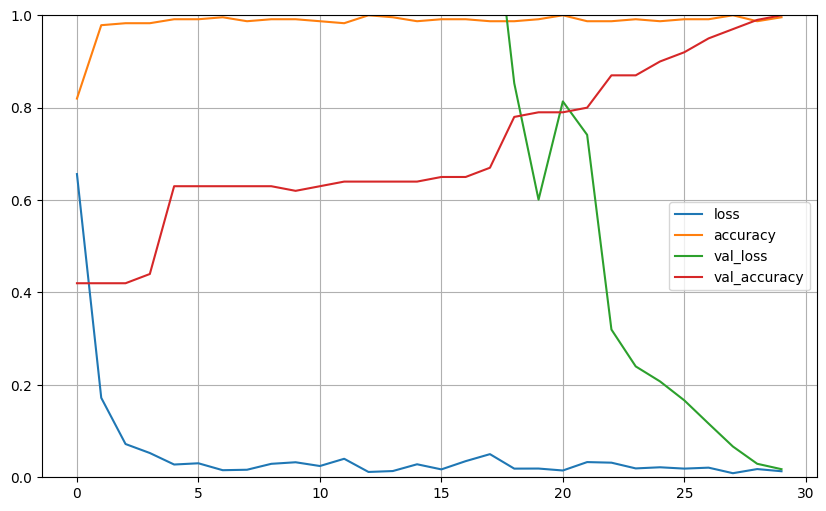

In [36]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()